In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# datasets

In [3]:
n_samples = 1500

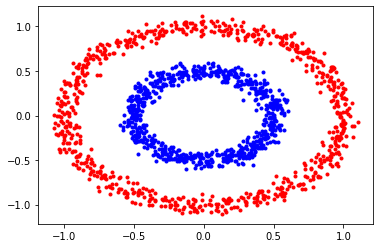

In [6]:
X, y = datasets.make_circles(n_samples=n_samples,
                                      factor=0.5,
                                      noise=.05)

plt.plot(X[y == 0, 0], X[y == 0, 1], 'r.')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'b.')

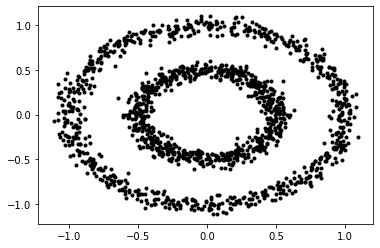

In [16]:
noisy_circles = datasets.make_circles(n_samples=n_samples,
                                      factor=0.5,
                                      noise=.05)[0]

plt.plot(noisy_circles[:, 0], noisy_circles[:, 1], 'k.')

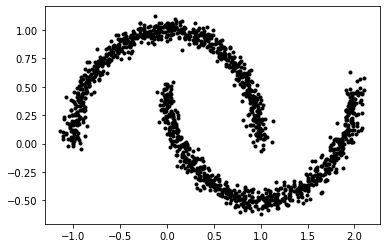

In [11]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)[0]

plt.plot(noisy_moons[:, 0], noisy_moons[:, 1], 'k.')

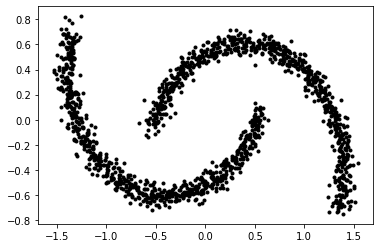

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
noisy_moons = pca.fit_transform(noisy_moons)

plt.plot(noisy_moons[:, 0], noisy_moons[:, 1], 'k.')

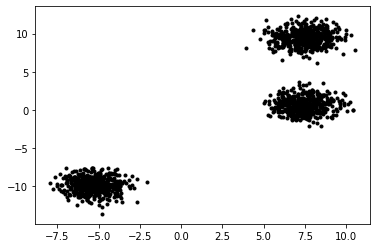

In [36]:
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

plt.plot(blobs[:, 0], blobs[:, 1], 'k.')

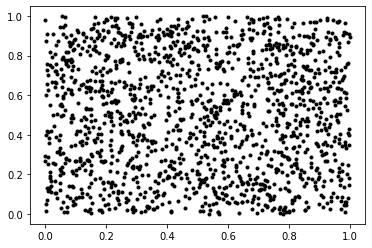

In [37]:
no_structure = np.random.rand(n_samples, 2)

plt.plot(no_structure[:, 0], no_structure[:, 1], 'k.')

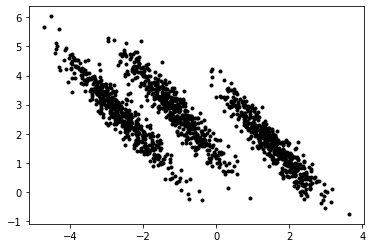

In [39]:
aniso = datasets.make_blobs(n_samples=n_samples, random_state=3)[0]
transformation = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(aniso, transformation)

plt.plot(aniso[:, 0], aniso[:, 1], 'k.')

# clustring

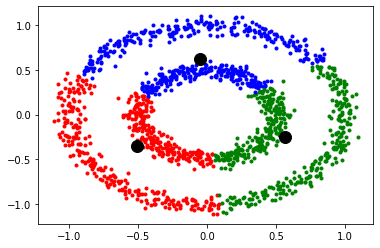

In [73]:
clu = KMeans(n_clusters=3)
clu.fit_predict(noisy_circles)
y = clu.labels_

colors = 'rgbycm'
for k in range(clu.n_clusters):
    plt.plot(noisy_circles[y == k, 0], noisy_circles[y == k, 1], colors[k] + '.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'ko', markersize=12)

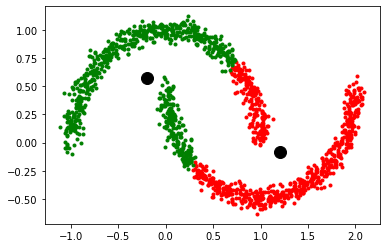

In [77]:
clu = KMeans(n_clusters=2)
clu.fit_transform(noisy_moons)
y = clu.labels_

colors = 'rgbycm'
for k in range(clu.n_clusters):
    plt.plot(noisy_moons[y == k, 0], noisy_moons[y == k, 1], colors[k] + '.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'ko', markersize=12)

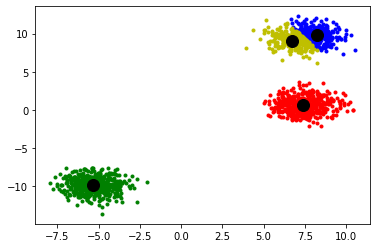

In [83]:
clu = KMeans(n_clusters=3)
clu.fit_transform(blobs)
y = clu.labels_

colors = 'rgbycm'
for k in range(clu.n_clusters):
    plt.plot(blobs[y == k, 0], blobs[y == k, 1], colors[k] + '.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'ko', markersize=12)

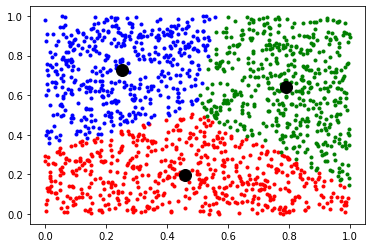

In [86]:
clu = KMeans(n_clusters=3)
clu.fit_transform(no_structure)
y = clu.labels_

colors = 'rgbycm'
for k in range(clu.n_clusters):
    plt.plot(no_structure[y == k, 0], no_structure[y == k, 1], colors[k] + '.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'ko', markersize=12)

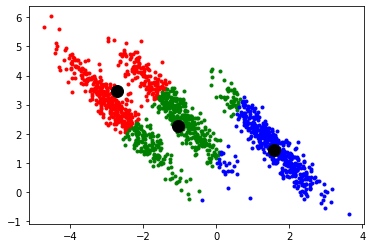

In [87]:
clu = KMeans(n_clusters=3)
clu.fit_transform(aniso)
y = clu.labels_

colors = 'rgbycm'
for k in range(clu.n_clusters):
    plt.plot(aniso[y == k, 0], aniso[y == k, 1], colors[k] + '.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'ko', markersize=12)

# CVI

Text(0, 0.5, 'inertia')

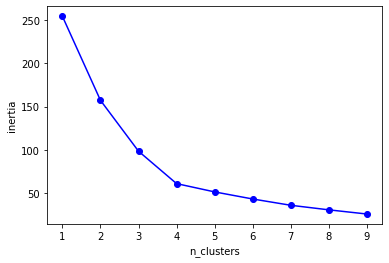

In [118]:
inertias = []

for n_clusters in range(1, 10):
    clu = KMeans(n_clusters=n_clusters)
    clu.fit_transform(no_structure)
    inertias.append(clu.inertia_)
    
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('n_clusters')
plt.ylabel('inertia')